In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import qutip

In [2]:
import sys 
path = 'C:/Users/Tomas/PhD_Physics/3rd_Year/Max-Ent_Library'
sys.path.insert(1, path) 

import a_quantum_stateology as TpM
import b_spin_ops as su2
import b_quantum_geometries as gij
import c_maxent_eom as me

ModuleNotFoundError: No module named 'c_quatum_geometries'

In [ ]:
params={}
params['size'],params['chain_type'] = 6,'XX'
params['h']=0;params['Jx']=.5*2*np.pi

In [ ]:
spin_ops = su2.one_body_spin_ops(args=params)
H0 = su2.Heisenberg_1D_Hamiltonian(args=params,
                                   spin_ops=spin_ops,
                                   closed_bcs=True, visualization=False)

In [ ]:
params['g'] = .1; params['w'] = params['Omega']=np.pi

Hint = sum(op for op in spin_ops['sz']) 
def Hint_tdcoeff(t, args):
    return args['g']*np.cos(-args['Omega']*t)

Vt = params['Omega'] * spin_ops['sz'][2]

H=[H0+Vt, [Hint, Hint_tdcoeff]]

In [ ]:
ket0 = qutip.tensor(qutip.basis(2,1),qutip.tensor([qutip.basis(2,0) for k in range(params['size']-1)]))
rho0=ket0*ket0.dag()

tlist= np.linspace(0,1,100)
exact_ev = qutip.mesolve(H=H, 
                         rho0=rho0, 
                         tlist=tlist,
                         c_ops= None,
                         args=params)

### Max-Ent method:


In [1]:
basis = [spin_ops['idop'][0], spin_ops['sz'][3]]
def gram_matrix(basis: list, sp: Callable):
    size = len(basis)
    result = np.zeros([size, size], dtype=float)

    for i, op1 in enumerate(basis):
        for j, op2 in enumerate(basis):
            if j < i:
                continue
            entry = np.real(sp(op1, op2))
            if i == j:
                result[i, i] = entry
            else:
                result[i, j] = result[j, i] = entry

    return result.round(14)

gram_matrix = gram_matrix(basis=basis, sp=gij.fetch_corr_inner_prod)


NameError: name 'spin_ops' is not defined

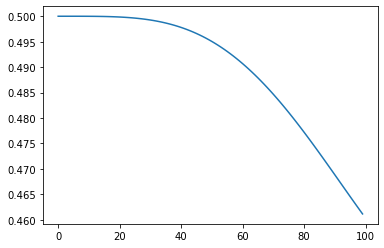

In [31]:
szj3_ev = [(rho*spin_ops['sz'][2]).tr() for rho in exact_ev.states]
plt.plot(szj3_ev)

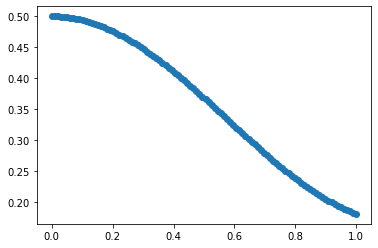

In [12]:

sz1_ev=[(rho*spin_ops['sz'][1]).tr() for rho in exact_ev.states]
plt.scatter(tlist, sz1_ev)

In [16]:
rho0.dims

[[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]]

In [17]:
qutip.tensor([qutip.qeye(2) for k in rho0.dims[0]])

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

In [11]:
ket0=qutip.basis(params['size'],0)
rho0=ket0*ket0.dag()
rho0

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

In [9]:
help(su2)

Help on module b_spin_ops:

NAME
    b_spin_ops - # In [0]:

FUNCTIONS
    Heisenberg_1D_Hamiltonian(args, spin_ops, closed_bcs=True, visualization=False, tol=1e-10)
        This module constructs different types of nearest-neighbour
        Heisenberg-like spin chains, using a list of local [see Warnings and Remarks] spin operators.
        This module takes as input the following parameters:
        
            *♥*♥* 1. spin_ops: a list of hermitian local [see Warnings and Remarks further below] spin operators.
            *♥*♥* 2. closed_bcs: boolean parameter, default value = True. 
                                 If a spin chain has more than two lattice sites, the spin chain can be made
                                 translationally invariant by adding an extra term corresponding to the N-th site's interaction
                                 with the first site. 
            *♥*♥* 3. visualization: boolean parameter, default value = False.
                                   

In [4]:
dir(sys.path.insert(1, path))

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/path/to/application/app/folder')

import file

In [3]:
N=7
g = .1

def Vt_coeff(t, args):
    return args['A']*np.cos(args['w']*t)

H = [H0, [Vt, Vt_coeff]]
exact_ev = qutip.mesolve(H=H, rho=rho0, t = tlist,
                        args=[N, op])

NameError: name 'H0' is not defined

In [4]:
args = {}
args[0],args[1],args[2],args[3] = [1,2,3,4]

In [5]:
args[0]

1

In [8]:
my_data = [
    { 'ID' : 1, 'stuff' : ['stuff1', 'stuff2', 'stuff3']},
    { 'ID' : 2, 'stuff' : ['stuff1', 'stuff2', 'stuff3']},
    { 'ID' : 3, 'stuff' : ['stuff1', 'stuff2', 'stuff3']},
]

In [15]:
type(my_data[0]['stuff'][0])

str